In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Entanglement entropy

### 2. Homogeneous XX chain

The homogeneous chain studied in [1] has $J_n=J\in\mathbb{R}$, $h_n=h\in\mathbb{R}$. If we considered periodic boundary conditions, the system would be invariant under translations (all sites on the chain look the same). Translational invariance would imply momentum conservation, therefore we should work in the momentum (Fourier) basis.

$$
\tilde{a}_k = \frac{1}{\sqrt{N}}\sum\limits_{n=0}^{N-1} a_n e^{-i\frac{2\pi}{N}nk}
$$

So $E=\Phi^\dagger H^1\Phi$, with the diagonalisation being $\Phi_{nk}=\frac{1}{\sqrt{N}}e^{-i\frac{2\pi}{N}nk}$. Let's naively apply this diagonalisation to the $H^1$ matrix with free boundary conditions:

$$
\sum\limits_{n=0}^{N-1}\sum\limits_{m=0}^{N-1}\Phi^\dagger_{jn} H^1_{nm} \Phi_{mk} = 
\frac{1}{N}\sum\limits_{n=0}^{N-1}\sum\limits_{m=0}^{N-1}e^{i\frac{2\pi}{N}jn}e^{-i\frac{2\pi}{N}mk}(J\delta_{n+1,m}+J\delta_{n-1,m}+h\delta_{nm}) =
$$

$$
= \frac{1}{N}\left(
(e^{i\frac{2\pi}{N}k}+e^{-i\frac{2\pi}{N}k})J\sum\limits_{n=0}^{N-2}e^{i\frac{2\pi}{N}n(j-k)}+
h\sum\limits_{n=0}^{N-1}e^{i\frac{2\pi}{N}n(j-k)}
\right) =
$$

$$
= \left(2\cos\left(\frac{2\pi k}{N}\right)J+h\right)\delta_{jk}+ o\left(\frac{1}{N}\right)
$$

$$
\boxed{
\begin{aligned}
    H&\approx\sum\limits_{n=0}^{N-1}\varepsilon_n\tilde{a}^\dagger_n\tilde{a}_n, &
    \varepsilon_n&\approx2\cos\left(\frac{2\pi n}{N}\right)J+h
\end{aligned}
}
$$

The diagonalisation still works in the thermodynamic limit, when $N\rightarrow\infty$.

In [ ]:
# Numerical test

We can now easily find the ground state. It will have one particle at each site that $\varepsilon_n$ is negative, therefore there are only particles where

$$
- \left(\frac{h}{J}\right) > 2\cos\left(\frac{2\pi n}{N}\right)
$$

Or, in other words

$$
\begin{aligned}
n_c \leq n \leq N - n_c, & & n_c &= \left\lceil\frac{N}{2\pi}\arccos\left(\frac{-h}{2J} \right)\right\rceil
\end{aligned}
$$

We therefore realise that if $h/J>2$ (the magnetic field is strong), the ground state is the vacuum $|0\rangle$ (all spins up).

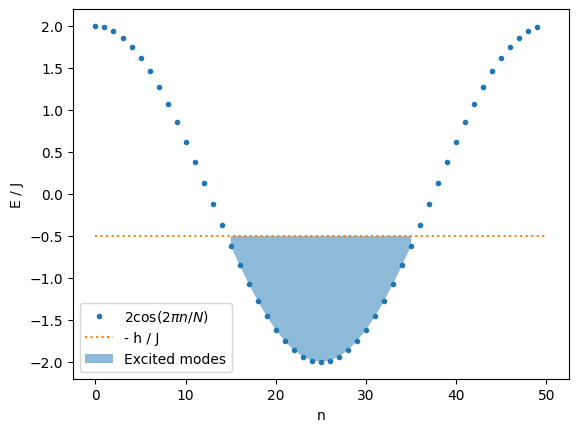

In [43]:
# Let's see the implications
N = 50
J = 2
h = 1

nc = int(np.ceil(N * np.arccos(- h / (2*J)) / (2 * np.pi)))
n = np.linspace(0, N-1, N)
osc = 2 * np.cos(2 * np.pi * n / N)
plt.plot(n, osc, '.')
plt.plot([0, N], [-h/J, -h/J], ':')
plt.fill_between(n[nc:N-nc+1], osc[nc:N-nc+1], - h / J, alpha=.5)
plt.xlabel('n')
plt.ylabel('E / J')
plt.legend(['$2\cos(2\pi n/N)$', '- h / J', 'Excited modes'])

### 3. General case

According to ref. [3] 

$$
\mathrm{d}s^2 = J(x)^2 \mathrm{d}t^2 - \mathrm{d}x^2
$$

### References

[1] Latorre, J., & Riera, A. (2009). A short review on entanglement in quantum spin systems. *Journal of Physics A: Mathematical and Theoretical, 42(50), 504002*. Retrieved from https://arxiv.org/abs/0906.1499

[2] Finkel, F., & González-López, A. (2020). Inhomogeneous XX spin chains and quasi-exactly solvable models. *Journal of Statistical Mechanics: Theory and Experiment, 2020(9), 093105*. Retrieved from https://arxiv.org/abs/2007.00369

[3] Finkel, F., & González-López, A. (2021). Entanglement entropy of inhomogeneous XX spin chains with algebraic interactions. *Journal of High Energy Physics, 2021(12)*. Retrieved from https://arxiv.org/abs/2107.12200